In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score,davies_bouldin_score,adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import classification_report

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

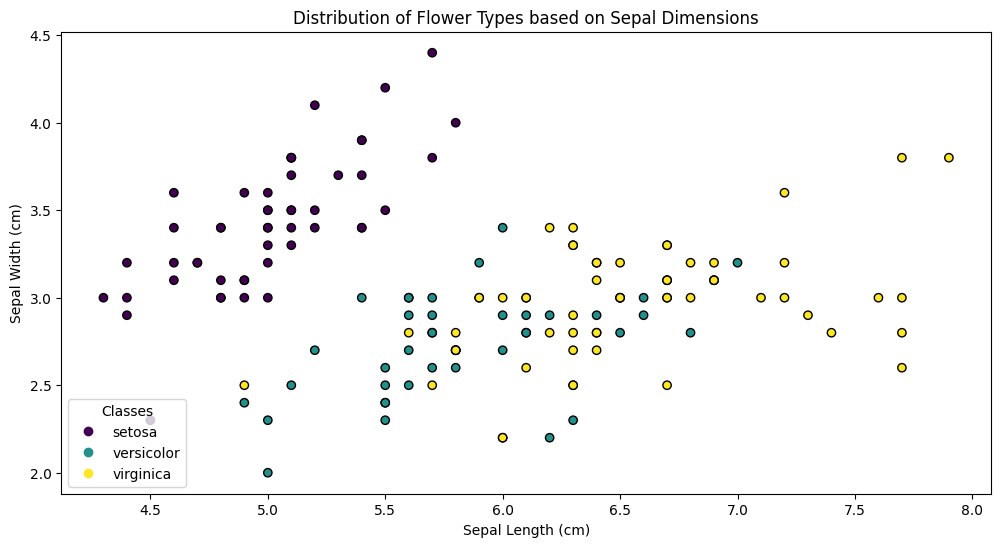

In [4]:
# Scatter plot for Sepal Length vs Sepal Width
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='viridis', edgecolor='k')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_title('Distribution of Flower Types based on Sepal Dimensions')
class_labels = [iris.target_names[label] for label in np.unique(df['target'])]
handles, _ = scatter.legend_elements()
ax.legend(handles, class_labels, loc="lower left", title="Classes")
plt.show()


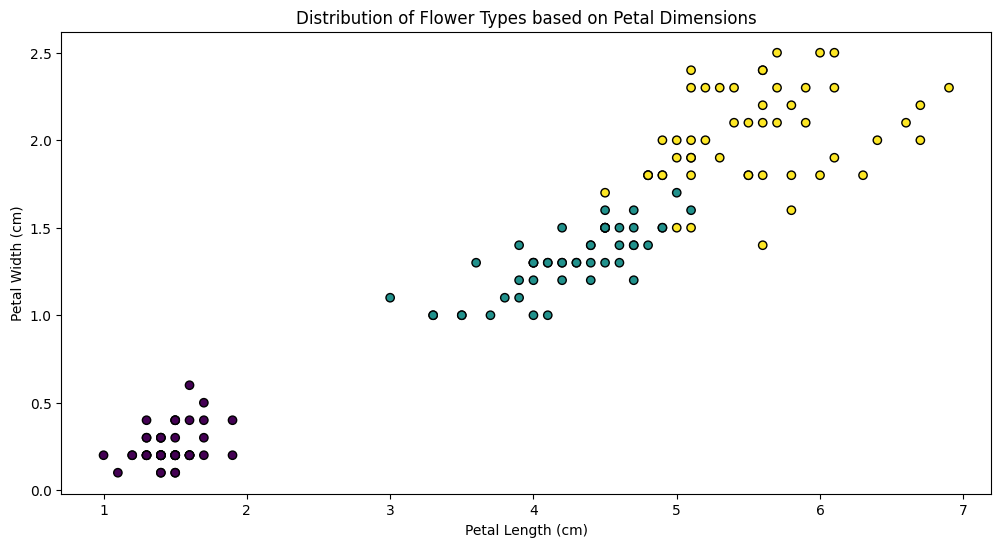

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['target'], cmap='viridis', edgecolor='k')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Distribution of Flower Types based on Petal Dimensions')
plt.show()

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)


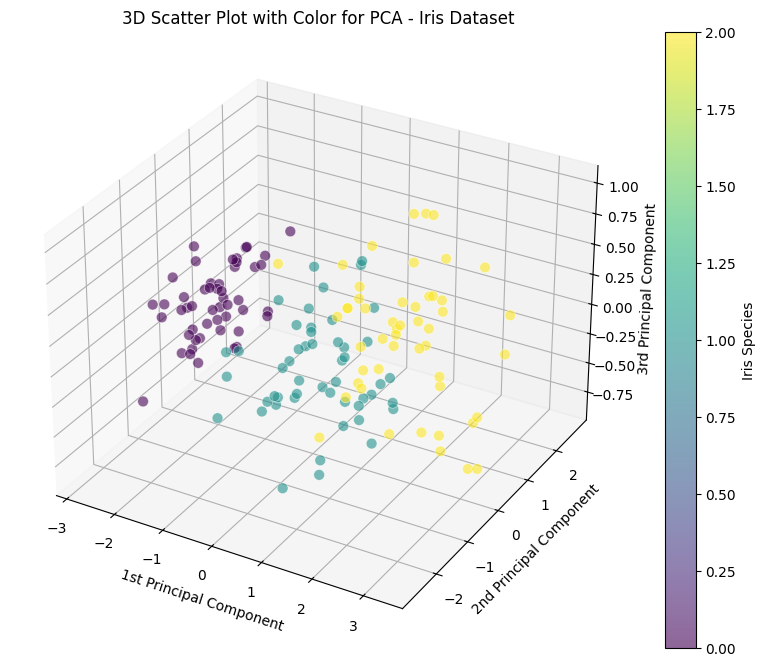

In [7]:
component1 = principal_components[:, 0]
component2 = principal_components[:, 1]
component3 = principal_components[:, 2]

colors = iris.target

# Create a 3D scatter plot with color using PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot with color
scatter = ax.scatter(component1, component2, component3, c=colors, cmap='viridis', s=60, alpha=0.6, edgecolors="w", linewidth=0.5)

ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')
ax.set_title('3D Scatter Plot with Color for PCA - Iris Dataset')

# Add a colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Iris Species')

plt.show()


In [8]:
feature_names = iris.feature_names

# Create a DataFrame to display the results
result_df = pd.DataFrame(
    data=pca.components_.T,  # Transpose to have features as columns
   
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=feature_names
) 
# Display the DataFrame
print(result_df)

                        PC1       PC2       PC3
sepal length (cm)  0.521066  0.377418 -0.719566
sepal width (cm)  -0.269347  0.923296  0.244382
petal length (cm)  0.580413  0.024492  0.142126
petal width (cm)   0.564857  0.066942  0.634273


# Clustering

In [17]:
print(data_scaled.shape)

(150, 4)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


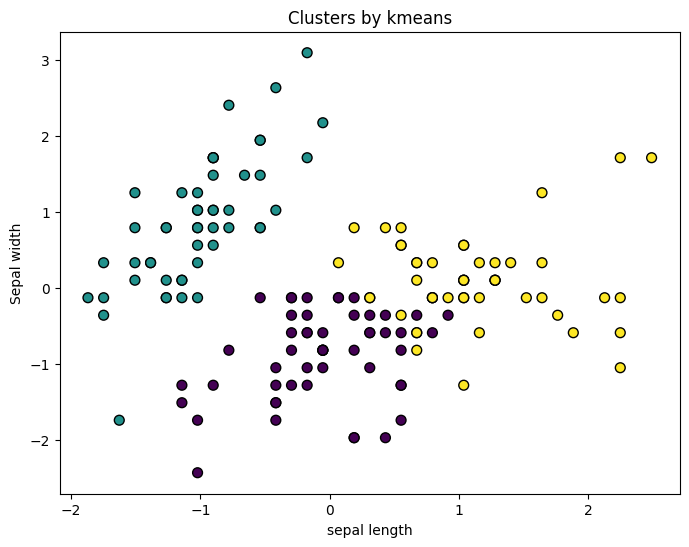

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


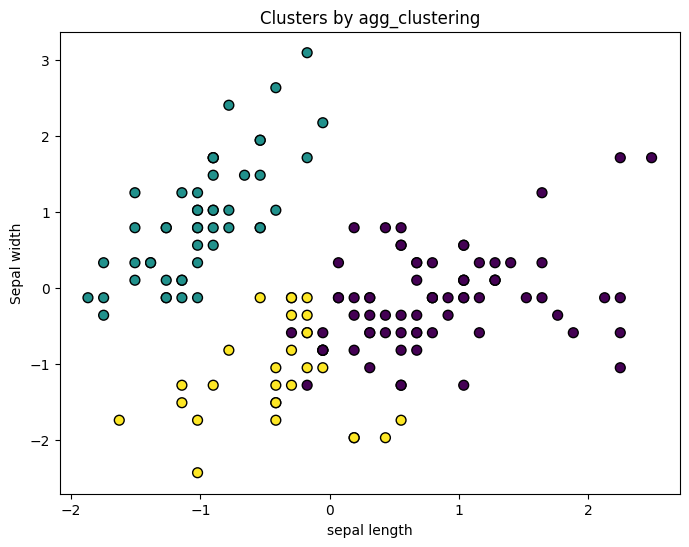

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


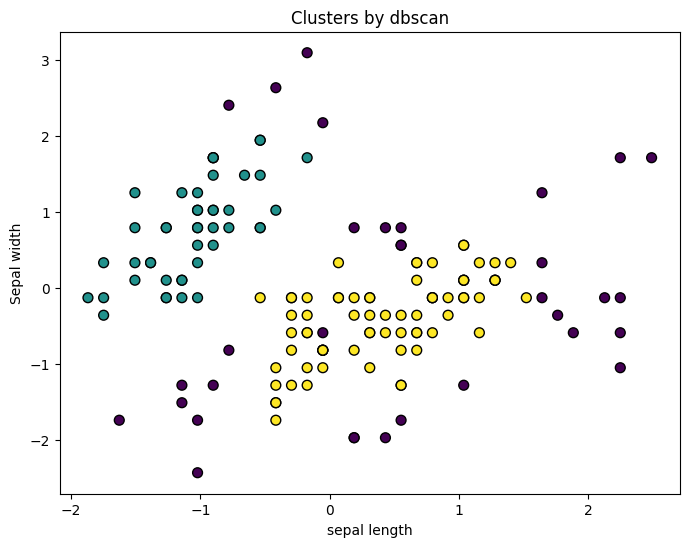

            Model  silhouette_avg   davies_bouldin  adjusted_ran
0          kmeans        0.459948         0.833595      0.620135
1  agg_clustering        0.446689         0.803467      0.615323
2          dbscan        0.356516         7.124057      0.442099


In [37]:
def plot_clusters_2d(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel('sepal length')
    plt.ylabel('Sepal width')
    plt.show()
results_df = pd.DataFrame(columns=['Model', 'silhouette_avg',' davies_bouldin','adjusted_ran'])
models = {
            'kmeans':  KMeans(n_clusters=3, random_state=42,n_init=10),
            'agg_clustering': AgglomerativeClustering(n_clusters=3),
            'dbscan': DBSCAN(eps=0.5, min_samples=5)
        }
for model_name, model in models.items():
            labels = model.fit_predict(data_scaled)
            silhouette_avg = silhouette_score(data_scaled, labels)
            davies_bouldin = davies_bouldin_score(data_scaled, labels)
            adjusted_ran=adjusted_rand_score(target,labels)
            results_df.loc[len(results_df.index)]=[model_name,silhouette_avg,davies_bouldin,adjusted_ran ]
            print(labels)
            plot_clusters_2d(data_scaled, labels, f'Clusters by {model_name}')
print(results_df)           


        